# IMDB Movie Review Sentiment Analysis

## 1. Problem and Motivation

Sentiment analysis of movie reviews helps movie studios, streaming platforms, and researchers understand audience sentiment at scale. This enables data-driven decision-making for marketing, content recommendations, and product improvements. Automated text analysis is crucial for processing thousands of reviews, which would be infeasible to analyze manually.

## 2. Dataset Description

- **Name:** IMDB Dataset of 50K Movie Reviews
- **Source:** [Kaggle: lakshmi25npathi/imdb-dataset-of-50k-movie-reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
- **Rows:** 50,000
- **Columns:**
    - `review`: The text of the review
    - `sentiment`: Label (positive/negative)
- **Data Types:**
    - `review`: string (text)
    - `sentiment`: categorical
- **Missingness:** No missing values in either column
- **Sensitive Attributes:** Reviews may contain personal opinions and references to individuals

### Loading the Dataset

We'll use the `kagglehub` library as specified:

In [7]:
 
# import kagglehub

#  # Download the latest version 
# path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# print("Path to dataset files:", path)


In [20]:
path = 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\imdb-dataset-of-50k-movie-reviews\\versions\\1'

In [21]:
import pandas as pd

# Assuming it's a CSV file, you can load it like this:
df = pd.read_csv(path + "/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
# Seeing the whole dataset and number of rows and columns
print(df.shape)
df

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
# 📋 Summary of the DataFrame — shows column names, data types, non-null values, and memory usage
df.info()
# 🧮 Calculate the total number of missing (NaN) values for each column in the DataFrame
missing_counts = df.isnull().sum()

# 🖨️ Print a summary showing how many missing values exist in each column
print("Missing values in each column:")
missing_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Missing values in each column:


review       0
sentiment    0
dtype: int64

In [13]:
# examine the class distribution
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## EDA

### searching for duplicates

In [ ]:
duplicated = df.duplicated()


print(f"Number of duplicated rows: {duplicated.sum()}")

# Remove duplicates
#df = df.drop_duplicates()

Number of duplicated rows: 418


### removing the duplicates

In [30]:
# Remove duplicates
df = df.drop_duplicates()

# Check again for duplicates
duplicated = df.duplicated()

print(f"Number of duplicated rows: {duplicated.sum()}")

Number of duplicated rows: 0


### Plot 1 – Target distribution plot for classification (bar plot of class counts).

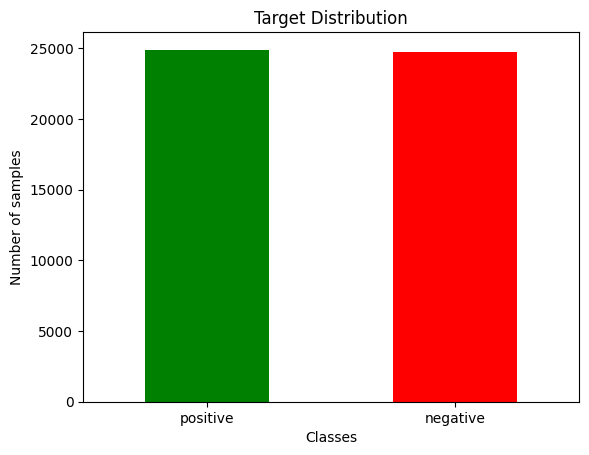

In [40]:
#!pip install matplotlib
#!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns


x = df.review
y = df.sentiment
target_plot = y.value_counts().plot(kind='bar', title='Target Distribution', xlabel='Classes', ylabel='Number of samples', color=['green', 'red'])
target_plot.set_xticklabels(target_plot.get_xticklabels(), rotation=0)
plt.show()


###  Plot 2 – Correlation heatmap or boxplot summary for key numeric features.


## 3. Tasks

### Classification Label
**Label:** `sentiment` (binary: positive or negative)

**How Derived:** The sentiment label is directly provided in the dataset, so no additional derivation is required. It is a categorical value that marks each review as either positive or negative.

**Feasibility:** Since the sentiment is already labeled, this is a supervised classification problem. You can use this to classify new movie reviews as positive or negative using text classification techniques

### Regression Target
**Target:** `sentiment_strength` (continuous value)

Since the dataset does not directly contain numerical ratings, we can derive a regression target based on the sentiment label.

**How Derived:**

We'll create a new column, `sentiment_strength`:

- Positive sentiment → 1 (high score)

- Negative sentiment → -1 (low score)

**Feasibility:** This is feasible because we already have the sentiment label, and you can map the categorical values to numerical ones for a regression task. The task then becomes predicting the sentiment score rather than classifying it into categories.

In [ ]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# check that the conversion worked
sms.head()

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)


# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


from sklearn.feature_extraction.text import CountVectorizer

# 2. instantiate the vectorizer
vect = CountVectorizer()


# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
# and 4. transform training data
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
X_train_dtm


# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm




# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()





